# Case 1 - Heart disease prediction
Samuel Räsänen, Arttu Sundell, Jari Putaansuu<br>
Helsinki Metropolia University of Applied Sciences<br>
02.02.2020


The aim of this case study is to explore and build a simple as possible neural network to support clinical decision making in determining if a person is suffering from an angiographic heart disease. 

## Background

### 1. Used data set
The data used in this case study is a well known and ...
In this case study, we are using the processed cleveland dataset, where the number of attributes have been diminished to 13 from the original set of almost 80 attributes.<br>
The dataset used is available at:<br>
https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
    
### Data set columns and corresponding attributes are as follows: <br>
 
<b>Column numbers & corresponding attributes</b><br>

0 = age [years]<br>
1 = sex [male = 1, female = 0]<br>
2 = cp -- chest pain type [Value 1: typical angina, 2: atypical angina, 3: non-anginal pain,4: asymptomatic]<br>
3 = trestbps -- restin blood pressure [in mm Hg on admission to the hospital]<br>
4 = chol --serum cholesterol [mg/dl]<br>
5 = fbs -- fastin blood sugar fasting blood sugar > 120 mg/dl) [1 = true; 0 = false] <br>
6 = restecg -- resting electrocardiographic results [Value 0: normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: showing probable or definite left ventricular hypertrophy by Estes' criteria] <br>
7 = thalach -- maximum heart rate achieved<br>
8 = exang -- exercise induced angina [1 = yes; 0 = no]<br>
9 = oldpeak -- ST depression induced by exercise relative to rest<br>
10 = slope --  the slope of the peak exercise ST segment [Value 1: upsloping, 2: flat, 3: downsloping]<br>
11 = ca -- number of major vessels (0-3) colored by flourosopy <br>
12 = thal --  [3 = normal, 6 = fixed defect, 7 = reversable defect]<br>
13 = num --(the predicted attribute) diagnosis of heart disease (angiographic disease status) [Value 0: < 50% diameter narrowing, 1: > 50% diameter narrowing]
      




## Methods
This section describes all the tools and methods used in our machine learning model.

### Libraries used <br>

In [133]:
### Importing necessary dependencies

%pylab inline
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

Populating the interactive namespace from numpy and matplotlib


### 1. Data set preprocessing
      
Even though we used a preprocessed data set, there was still missing values in the data set that needed to be processed. In the following code, the index column was removed and missing values specified with the character '?' were marked and set to '0'

In [134]:
filename = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data" #Assigning the data source
df = pd.read_csv(filename, index_col = None, header = None, na_values = '?') # Reading the data file
df = df.dropna() # removing index column and headers and specifying missing value notation
df.fillna(0) #    filling n/a values with 0
df.tail() # printing the tail (5 values) of the data
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


The data was split in to input variables (the first 12 attributes) and the true target values (diagnosis of heart disease)

In [135]:
data = df.loc[:, 0:12] ### Splitting the data, columns 0-12 and labels, column 13 (cast all values to 1 where value is more than 0)
labels = 1.0*(df.loc[:, 13] > 0)
print(data.shape)##  printing the shape of data and labels afterwards
print(labels.shape)
## labels_healthy = (df.loc[:, 13] == 0)
## labels_diseased = (df.loc[:, 13] > 0)
## print(labels_healthy)
## print(labels_diseased)

(297, 13)
(297,)


Estimatros might not work properly if the individual input data paramaeters differ a lot in scales and distributions. Since the data consists of different types of variables with values ranging from 0 to hundreds, it needed to be scaled in order to make the scales and distributions to align and optimize the data for a neural network application.

In [136]:
minmax_scaler = preprocessing.MinMaxScaler()# Creating a scaler
scaled_data = minmax_scaler.fit_transform(data)# Scaling the data to only have values between 0 and 1. 
df = pd.DataFrame(scaled_data)
df.describe() # df.describe to validate the scaling is done

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,0.532127,0.676768,0.719416,0.355600,0.277055,0.144781,0.498316,0.599995,0.326599,0.170251,0.301347,0.225589,0.432660
std,0.188536,0.468500,0.321620,0.167574,0.118716,0.352474,0.497457,0.175126,0.469761,0.188084,0.309093,0.312988,0.484657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.000000,0.666667,0.245283,0.194064,0.000000,0.000000,0.473282,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.562500,1.000000,0.666667,0.339623,0.267123,0.000000,0.500000,0.625954,0.000000,0.129032,0.500000,0.000000,0.000000
75%,0.666667,1.000000,1.000000,0.433962,0.342466,0.000000,1.000000,0.725191,1.000000,0.258065,0.500000,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Splitting the data to training and test set
The data to train needs to be separated from the test and validation data. 

In [137]:

train_data,test_data,train_labels,test_labels = model_selection.train_test_split(df,labels,test_size=0.30,shuffle=True)
#Splitting the data and labels to the training set and test set (70% training set, 30% test set) 
#shuffle=True => shuffle from where to take the training and test samples

# Casting the labels as numpy arrays to avoid Tensorflow Warnings
train_data = np.asarray(train_data)
test_data = np.asarray(test_data)
train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)

## Building the model <br>

<b> The amount of layers and neurons:</b>
A very simple binary classification problem could be solved using only the input and the output layers with sufficient amount of neurons.
For complex classification problems you usually need one or more hidden layers in addition to input and output layers, since multilayer networks are better in  approximating. It is best to start with 1 or 2 hidden layers.
The best amount of neurons is achieved by trial and error. In solving binary classification problems, the number of neurons in the output layer should always be 1.

<b>The activation functions:</b>The most widely used and relevant activation functions concerning this case are Relu and Sigmoid. In binary classification the activation function used for the output layer should always be sigmoid, since sigmoid squashes the output in the range of [0,1],  which can be interpreted as the probability of the input being in class 1.

<b>The loss function</b>: The loss function generally used for binary classification problems such as the one we are investigating is the binary cross-entropy loss also called the negative log likelihood. Cross-entropy will calculate a score that summarizes the average difference between the actual and predicted probability distributions for predicting class 1. The aim is to minimize the score to as close as possible to 0. Another threshold to keep in mind is that a  log loss value of 0.693 would mean that the probability of the prediction is 50%.

<b>Optimizer:</b> The most suitable optimizer options that we encountered having used in similar cases are rmsprop and adam.<br>

<b>Number of epochs</b> is defined by trial and error. After testin the models and visualizing the losses and accuracies of training and validation data, the appropriate amount of epochs should be defined by the visualized data.

<b>The size of the batch </b> defines how often the the weight and bias parameters are updated going throuh all the training data during one epoch.

Considering the above we built 3 different models:<br>
Model 1: For the reasons of trying a really simple "neural network" we created a simple model with only input and output layers. No activation function in teh input layer and sigmoid in the output layer. Adam as optimizer. <br>
Model 2: Model with additional hidden layer, using relu and input and output using sidmoid-activation functions. Adam as optimizer <br>
Model 3: Model with 1 hidden layer, using sigmoid activation function on all the layers and an rmsprop optimizer.<br>

A binary cross-entropy loss function was used for all models as wel as a dropout of 20 % after each layer.

In [138]:
### Creating the neural network model
##  choosing the activation & loss methods, optimizer and metrics
#   dropout 20-50% to prevent overfitting

# Model 1 ,simple model with input and output layers
model1 = Sequential()
model1.add(Dense(64, input_shape=(train_data.shape[1],)))
model1.add(Dropout(0.2))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#model 2, 1 hidden layer relu-sigmoid-sigmoid
model2 = Sequential()
model2.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='sigmoid'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#model 3, 1 hidden layer sigmoid-sigmoid-sigmoid

model3 = Sequential()
model3.add(Dense(64, activation='sigmoid', input_shape=(train_data.shape[1],)))
model3.add(Dropout(0.2))
model3.add(Dense(64, activation='sigmoid'))
model3.add(Dropout(0.2))
model3.add(Dense(1, activation='sigmoid'))
model3.summary()
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_170 (Dense)            (None, 64)                896       
_________________________________________________________________
dropout_109 (Dropout)        (None, 64)                0         
_________________________________________________________________
dense_171 (Dense)            (None, 1)                 65        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_172 (Dense)            (None, 64)                896       
_________________________________________________________________
dropout_110 (Dropout)        (None, 64)                0         
________________________________

The models were fitted using similar epochs and a small batch size.

In [139]:
### Fitting the model
##  usual syntax of fitting:
#   model.fit(train_data, train_labels, validation_split=0-1, batch_size=X, epochs=X)

# Splitting the data and labels to the training and validation set (75% training, 25% validation)

print ("Training prototype model 1....")
prototype1=model1.fit(train_data, train_labels, validation_split=0.25, epochs=500, batch_size=30,verbose=0)
print ("Training model 1complete.")

print ("Training prototype model 2....")
prototype2=model2.fit(train_data, train_labels, validation_split=0.25, epochs=500, batch_size=30,verbose=0)
print ("Training model 2 complete.")

print ("Training prototype model 3....")
prototype3=model3.fit(train_data, train_labels, validation_split=0.25, epochs=500, batch_size=30,verbose=0)
print ("Training model 3 complete.")

# Printing plottable values
print(prototype1.history.keys())

Training prototype model 1....
Training model 1complete.
Training prototype model 2....
Training model 2 complete.
Training prototype model 3....
Training model 3 complete.
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Model 1


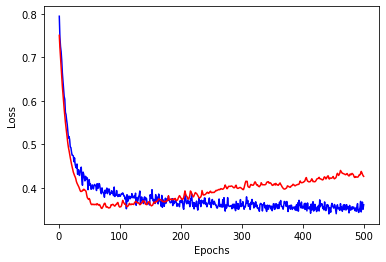

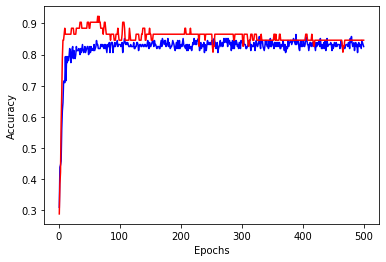

Model 2


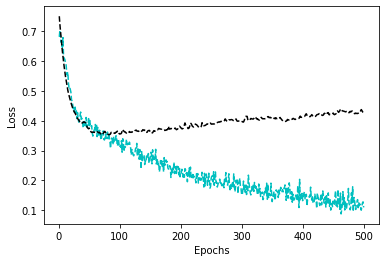

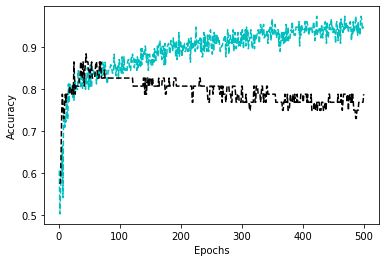

Model 3


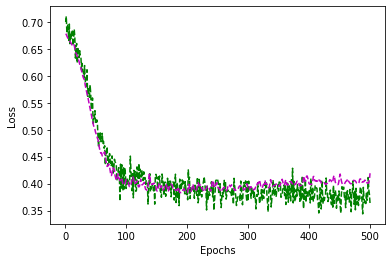

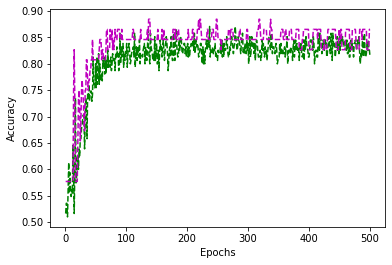

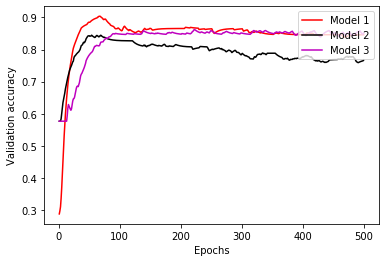

In [140]:
### Plotting Epochs in correlation to loss and accuracy
#model 1
loss = prototype1.history['loss']
val_loss = prototype1.history['val_loss']
accuracy = prototype1.history['accuracy']
val_accuracy = prototype1.history['val_accuracy']

time = range(1,len(loss)+1)

#model 2
loss2 = prototype2.history['loss']
val_loss2 = prototype2.history['val_loss']
accuracy2 = prototype2.history['accuracy']
val_accuracy2 = prototype2.history['val_accuracy']

time2 = range(1,len(loss)+1)

#model 3
loss3 = prototype3.history['loss']
val_loss3 = prototype3.history['val_loss']
accuracy3 = prototype3.history['accuracy']
val_accuracy3 = prototype3.history['val_accuracy']

time3 = range(1,len(loss)+1)

#plots
#model 1
print("Model 1")
plt.plot(time, loss, 'b-')
plt.plot(time, val_loss, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(time, accuracy, 'b-')
plt.plot(time, val_accuracy, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

#model2
print("Model 2")
plt.plot(time2, loss2, 'c--')
plt.plot(time2, val_loss, 'k--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(time2, accuracy2, 'c--')
plt.plot(time2, val_accuracy2, 'k--')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

#model3
print("Model 3")
plt.plot(time3, loss3, 'g--')
plt.plot(time3, val_loss3, 'm--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(time3, accuracy3, 'g--')
plt.plot(time3, val_accuracy3, 'm--')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

### Smooth the validation accuracy curve to find the optimal amount of Epochs

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_val_accuracy = smooth_curve(val_accuracy[0:])
smooth_val_accuracy2 = smooth_curve(val_accuracy2[0:])
smooth_val_accuracy3 = smooth_curve(val_accuracy3[0:])

plt.plot(range(1, len(smooth_val_accuracy) + 1), smooth_val_accuracy, 'r-')
plt.plot(range(1, len(smooth_val_accuracy2) + 1), smooth_val_accuracy2, 'k-')
plt.plot(range(1, len(smooth_val_accuracy3) + 1), smooth_val_accuracy3, 'm-')
plt.legend(('Model 1', 'Model 2', 'Model 3'),
           loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Validation accuracy')
plt.show()

In [141]:
### Build a fresh neural network model based on the graphical data to avoid over/undertraining
model1 = Sequential()
model1.add(Dense(64, input_shape=(train_data.shape[1],)))
model1.add(Dropout(0.2))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model2 = Sequential()
model2.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model2.add(Dropout(0.2))
model2.add(Dense(65, activation='sigmoid'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model3 = Sequential()
model3.add(Dense(64, activation='sigmoid', input_shape=(train_data.shape[1],)))
model3.add(Dropout(0.2))
model3.add(Dense(64, activation='sigmoid'))
model3.add(Dropout(0.2))
model3.add(Dense(1, activation='sigmoid'))
model3.summary()
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_178 (Dense)            (None, 64)                896       
_________________________________________________________________
dropout_114 (Dropout)        (None, 64)                0         
_________________________________________________________________
dense_179 (Dense)            (None, 1)                 65        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_180 (Dense)            (None, 64)                896       
_________________________________________________________________
dropout_115 (Dropout)        (None, 64)                0         
________________________________

In [143]:
### Train the new final model for a suitable amount to obtain best results
##  check optimal epoch amount from above to avoid overfitting etc.
#   now do use the whole training data, including the samples previously used for validation only)

print ("Training final models....")
final = model1.fit(train_data, train_labels, epochs=50, batch_size=32, verbose=0)
final = model2.fit(train_data, train_labels, epochs=100, batch_size=32, verbose=0)
final = model3.fit(train_data, train_labels, epochs=100, batch_size=32, verbose=0)
print ("Training complete.")

Training final models....
Training complete.


In [144]:
### Evaluate final models against the unseen test data and labels
##  if the 
print("Evaluate model against unsen data")
score = model1.evaluate(test_data, test_labels, verbose=0)
score2 = model2.evaluate(test_data, test_labels, verbose=0)
score3 = model3.evaluate(test_data, test_labels, verbose=0)
print("score model 1 %s: %.2f%%" % (model1.metrics_names[1], score[1]*100))
print("score model 2 %s: %.2f%%" % (model2.metrics_names[1], score2[1]*100))
print("score model 3 %s: %.2f%%" % (model3.metrics_names[1], score3[1]*100))

Evaluate model against unsen data
score model 1 accuracy: 88.89%
score model 2 accuracy: 87.78%
score model 3 accuracy: 87.78%


## Results
Having tested several different models of neural networks we find that the best results were achieved using a model with one hidden layer in addition to input and output layers.  We also found that the sigmoid activation function gives aout the best results. The amount of epochs was optimal in the range of 50-100 epochs with a batch size of 6 or 30. A model consisting of input layer, hidden layer and outputlayer all utilizing sigmoid activation function, adam optimizer and training with 100 epoch / 6 n batch gave us a highscore of having a  accuracy of 91,67%. To our surprise, the most simplest model, model 1 was also capable of hittin over 80 % accuracy levels. The one utilizing relu was found to be the worst in performance for this particular case. However, the data set is a bit too little to efficiently asses which model is the best. We would't be offering these models to include in Apotti with this stage of developement.

## Sources:
1. Jason Brownlee 2019. How to Choose Loss Functions When Training Deep Learning Neural Networks. Machine Learning Mastery website. Available at: https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/ <br>
2. Jason Brownlee 2019. How to Control the Stability of Training Neural Networks With the Batch Size. Machine Learning Mastery website. Available at: https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/ <br>